In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Basic dataset exploration

In [19]:
# reading the given dataset 
data = pd.read_csv("ex1data1.txt", header = None)

In [20]:
data.head() 
# column 0 is my X, and column 1 is my y

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [21]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [22]:
# defining the variables. m is number of data points  
X = data.iloc[:,0]
y = data.iloc[:,1]
m = len(y)

Text(0.5, 1.0, 'Population vs Profit')

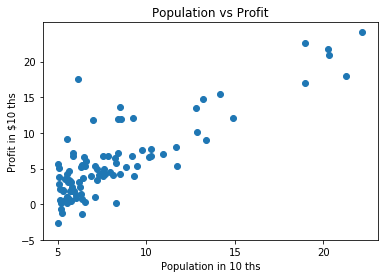

In [23]:
# basic scatterplot will work fine as I have only 1 dimension. From the scatterplot I can see how the line will
#  approximately lie on the plane
plt.scatter(X, y)
plt.xticks(np.arange(5, 25, step = 5))
plt.yticks(np.arange(-5, 25, step = 5))
plt.xlabel('Population in 10 ths')
plt.ylabel('Profit in $10 ths')
plt.title ('Population vs Profit')

### Cost and gradient descent

In [24]:
# First, I add an extra parameter - the intercept term
# np.newaxis is called to convert the shape of X and y arrays from (m, ) to (m, 1)
# This is done because (m, ) shaped arrays, i.e. rank 1 arrays, can behave unexpectedly  
X = X[:,np.newaxis]
y = y[:,np.newaxis]

theta = np.zeros([2,1])
ones = np.ones((m,1))
X = np.hstack((ones, X)) #so now X is a 2-dimensional matrix
np.shape(X)

(97, 2)

In [13]:
# Then, I set the number of iterations and step size (or learning rate), alpha 
iterations = 1500
alpha = 0.01

In [9]:
# Here I define the cost function, J, which is the average sum of squared errors (2 in denominator is added
# for convenience, when calculating the gradient descent)
def computeCost(X, y, theta):
    err = np.dot(X, theta) - y
    return 1/(2*m)*np.sum(err**2)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


In [14]:
# Defining and running the gradient descent function to find the optimal values of the parameters, theta
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        err = np.dot(X, theta) - y
        err = np.dot(X.T, err)
        theta -= (alpha/m) * err
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [15]:
# Now that I have the optimal parameters, theta, minimizing the cost, I can compute the cost to see that 
# the gradient descent has worked
J = computeCost(X, y, theta)
print(J)

4.483388256587725


### Plotting the linear regression

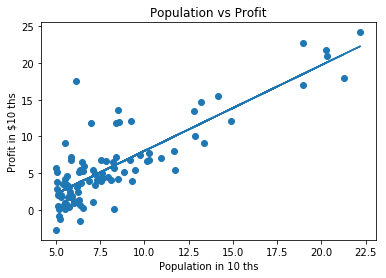

In [16]:
# Plotting the best fit line that runs through the data scatterplot and generalizes it well
plt.scatter(X[:,1], y)
plt.xlabel('Population in 10 ths')
plt.ylabel('Profit in $10 ths')
plt.title('Population vs Profit')
plt.plot(X[:,1], np.dot(X, theta))